In [27]:
import numpy
import scipy.special

class NeuralNetwork:
  def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    self.wih = numpy.random.normal(0.0 , pow(self.hnodes,-0.5), (self.hnodes,self.inodes))
    self.who = numpy.random.normal(0.0 , pow(self.onodes,-0.5), (self.onodes,self.hnodes))

    self.lr = learningrate
    self.activation_function = lambda x: scipy.special.expit(x)
    pass
  
  def train(self, inputs_list, targets_list):
    inputs = numpy.array(inputs_list,ndmin=2).T
    targets = numpy.array(targets_list, ndmin=2).T
    hidden_inputs = numpy.dot(self.wih,inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = numpy.dot(self.who,hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = numpy.dot(self.who.T,output_errors)
    self.who += self.lr * numpy.dot(output_errors * final_outputs * (1.0 - final_outputs),numpy.transpose(hidden_outputs))
    self.wih += self.lr * numpy.dot(hidden_errors * hidden_outputs *(1.0 - hidden_outputs),numpy.transpose(inputs))
    pass

  def query(self,inputs_list):
    inputs = numpy.array(inputs_list, ndmin = 2).T
    hidden_inputs = numpy.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)
    final_inputs = numpy.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)
    return final_outputs


In [75]:
# количество входных скрытых выходных слоев
input_nodes = 784 
hidden_nodes = 20
output_nodes = 10

# коэффециент обучения 
learninig_rate = 0.3

n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learninig_rate)

In [76]:
import numpy as np
import matplotlib.pyplot
training_data_file = open("sample_data/mnist_train_small.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#all_values = training_data_list[0].split(',')
#image_array = np.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation='None')


for  record in training_data_list :
  all_values = record.split(',')
  inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)

1


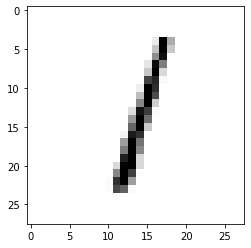

In [77]:
test_data_file = open("sample_data/mnist_test.csv",'r')
test_data_list = test_data_file.readlines() 
test_data_file.close()
all_values = test_data_list[2].split(',')
print(all_values[0])

image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation='None')

In [78]:
r= n.query((np.asfarray(all_values[1:])/255.0*0.99)+0.01)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(r)

[[ 0.000]
 [ 0.995]
 [ 0.001]
 [ 0.004]
 [ 0.000]
 [ 0.004]
 [ 0.002]
 [ 0.005]
 [ 0.001]
 [ 0.001]]
